# Importando Pandas

In [2]:
import pandas as pd

## Importando o arquivo csv

In [29]:
dados_import = pd.read_csv('clientes.csv', sep = ';')
print(type(dados_import))
dados_import
dados = pd.DataFrame(dados_import).set_index('Id')
# pd.DataFrame(dados.dtypes, columns= ['Tipos de dados'])
dados
# dados.info()

<class 'pandas.core.frame.DataFrame'>


,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria,Desconto
Id,,,,,,,
1,64,M,viuvo,0.0,774.464232,Sênior,697.017809
2,34,F,divorciado,7.0,1411.800897,Adulto,1411.800897
3,84,F,divorciado,2.0,803.922742,Sênior,803.922742
4,42,F,casado,2.0,1142.005576,Adulto,1142.005576
5,20,M,casado,NaN,940.051137,Jovem,940.051137
...,...,...,...,...,...,...,...
9996,79,F,casado,NaN,975.383433,Sênior,975.383433
9997,65,F,divorciado,0.0,1143.553683,Sênior,1029.198314
9998,18,M,casado,1.0,1028.185036,Jovem,1028.185036


## Exibindo a quantidade de linhas

In [30]:
tam_shape = dados.shape[0]
tam_len = len(dados)
unindo = [tam_shape, tam_shape]
unindo
colunas = ['tam_shape', 'tam_len']
tudo = list(zip(colunas, unindo))
tamanho = pd.DataFrame(tudo, columns= ['Método', 'tamanho'])
tamanho

,Método,tamanho
0,tam_shape,10000
1,tam_len,10000


## Ajustando a quantidade de sinistros

In [31]:
dados['Sinistros'].fillna(0, inplace= True)
dados.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         10000 non-null  int64  
 1   Sexo          10000 non-null  object 
 2   Estado Civil  10000 non-null  object 
 3   Sinistros     10000 non-null  float64
 4   Prêmio        10000 non-null  float64
 5   Categoria     10000 non-null  object 
 6   Desconto      10000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 625.0+ KB


## Arredondando casas decimais

In [38]:
# dados['Sinistros']= dados.Sinistros.round(2)
# dados['Prêmio']= dados.Prêmio.round(2)
# dados['Desconto']= dados.Desconto.round(2)
dados = dados.round({'Prêmio':2, 'Desconto':2})
dados['Sinistros']= dados['Sinistros'].astype(int)
dados



11

## Excluindo a variável Desconto

In [7]:
dados_excl1 = pd.DataFrame(dados[['Idade', 'Sexo', 'Estado Civil', 'Sinistros', 'Prêmio', 'Categoria']])
dados_excl1
dados_excl2 = pd.DataFrame(dados[['Idade', 'Sexo', 'Estado Civil', 'Sinistros', 'Prêmio', 'Categoria', 'Desconto']])
dados
del dados_excl2['Desconto']
dados_excl2
dados
dados_excl3 = pd.DataFrame(dados[['Idade', 'Sexo', 'Estado Civil', 'Sinistros', 'Prêmio', 'Categoria', 'Desconto']])
dados_excl3.pop('Desconto')
dados_excl3
dados.drop(['Desconto'], axis= 1, inplace= True)
dados


,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria
Id,,,,,,
1,64,M,viuvo,0,774.46,Sênior
2,34,F,divorciado,7,1411.80,Adulto
3,84,F,divorciado,2,803.92,Sênior
4,42,F,casado,2,1142.01,Adulto
5,20,M,casado,0,940.05,Jovem
...,...,...,...,...,...,...
9996,79,F,casado,0,975.38,Sênior
9997,65,F,divorciado,0,1143.55,Sênior
9998,18,M,casado,1,1028.19,Jovem


## Ordenando com base na idade

In [8]:
dados.sort_values(by= ['Idade'], inplace = True)
dados

,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria
Id,,,,,,
8550,18,F,viuvo,7,1096.77,Jovem
4417,18,F,viuvo,0,913.23,Jovem
1275,18,F,divorciado,2,1062.88,Jovem
1885,18,F,casado,5,1086.89,Jovem
4700,18,M,viuvo,1,1126.91,Jovem
...,...,...,...,...,...,...
6636,109,M,divorciado,7,794.72,Sênior
9288,109,M,divorciado,3,1261.34,Sênior
4628,109,M,solteiro,2,1310.83,Sênior


## Total de Premio por estado civil

In [9]:
# grupos = dados.groupby(by= 'Estado Civil')
# grupos.groups
# grupos_est = pd.DataFrame(grupos['Prêmio'].sum())
# grupos_est
# dados.groupby('Estado Civil')['Prêmio'].sum()
dados.groupby('Estado Civil')['Prêmio'].agg(['sum', 'mean', 'std', 'median']).rename(columns = {'sum': 'Soma', 'mean': 'Média', 'std': 'Desv_p', 'median': 'Mediana'})
# dados.groupby('Estado Civil')['Prêmio'].describe().round(2)

,Soma,Média,Desv_p,Mediana
Estado Civil,,,,
casado,2457538.44,999.405628,203.793649,1005.370
divorciado,2591592.31,1002.938200,197.180276,1004.280
solteiro,2474958.40,998.369665,197.410499,998.950
viuvo,2468433.14,996.139282,199.330139,996.365


## Contagem por categoria

Text(0.5, 1.0, 'Quantidade de Pessoas por Categoria')

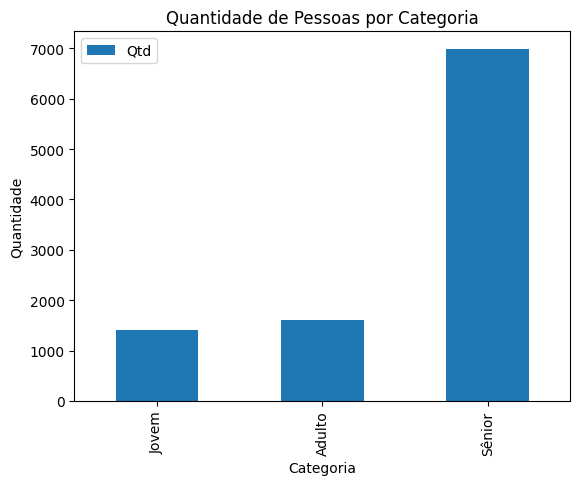

In [10]:
cont = dados.groupby('Categoria')['Categoria'].agg(['count']).rename(columns = {'count': 'Qtd'})
cont.sort_values(by = ['Qtd'], inplace = True)
cont
graf = cont.plot.bar()
graf.set_ylabel('Quantidade')
graf.set_title('Quantidade de Pessoas por Categoria')

# cont2 = dados.groupby('Categoria')['Categoria'].count()
# cont2.sort_values()

## Gráficos

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Sinistros por Sexo')

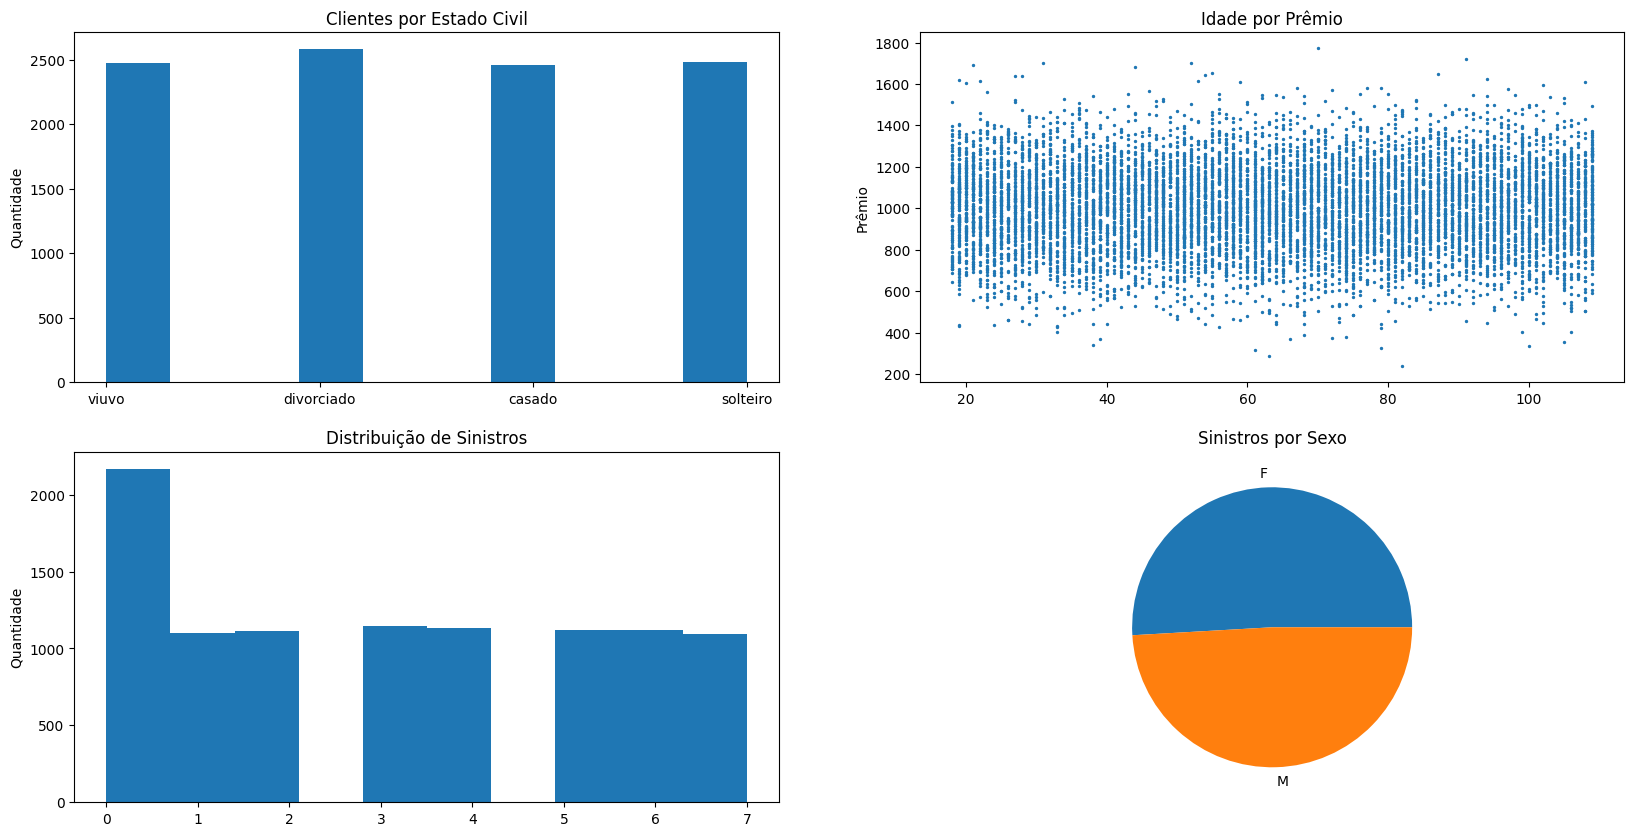

In [12]:
area = plt.figure()
fig1 = area.add_subplot(2, 2, 1)
fig2 = area.add_subplot(2, 2, 2)
fig3 = area.add_subplot(2, 2, 3)
fig4 = area.add_subplot(2, 2, 4)
fig1.hist(dados['Estado Civil'])
fig1.set_ylabel('Quantidade')
fig1.set_title('Clientes por Estado Civil')
fig2.scatter(dados['Idade'], dados['Prêmio'], s = 2)
fig2.set_ylabel('Prêmio')
fig2.set_title('Idade por Prêmio')
fig3.hist(dados['Sinistros'])
fig3.set_ylabel('Quantidade')
fig3.set_title('Distribuição de Sinistros')
fig4.pie(dados.groupby('Sexo')['Sinistros'].sum(), labels= dados['Sexo'].unique())
fig4.set_title('Sinistros por Sexo')




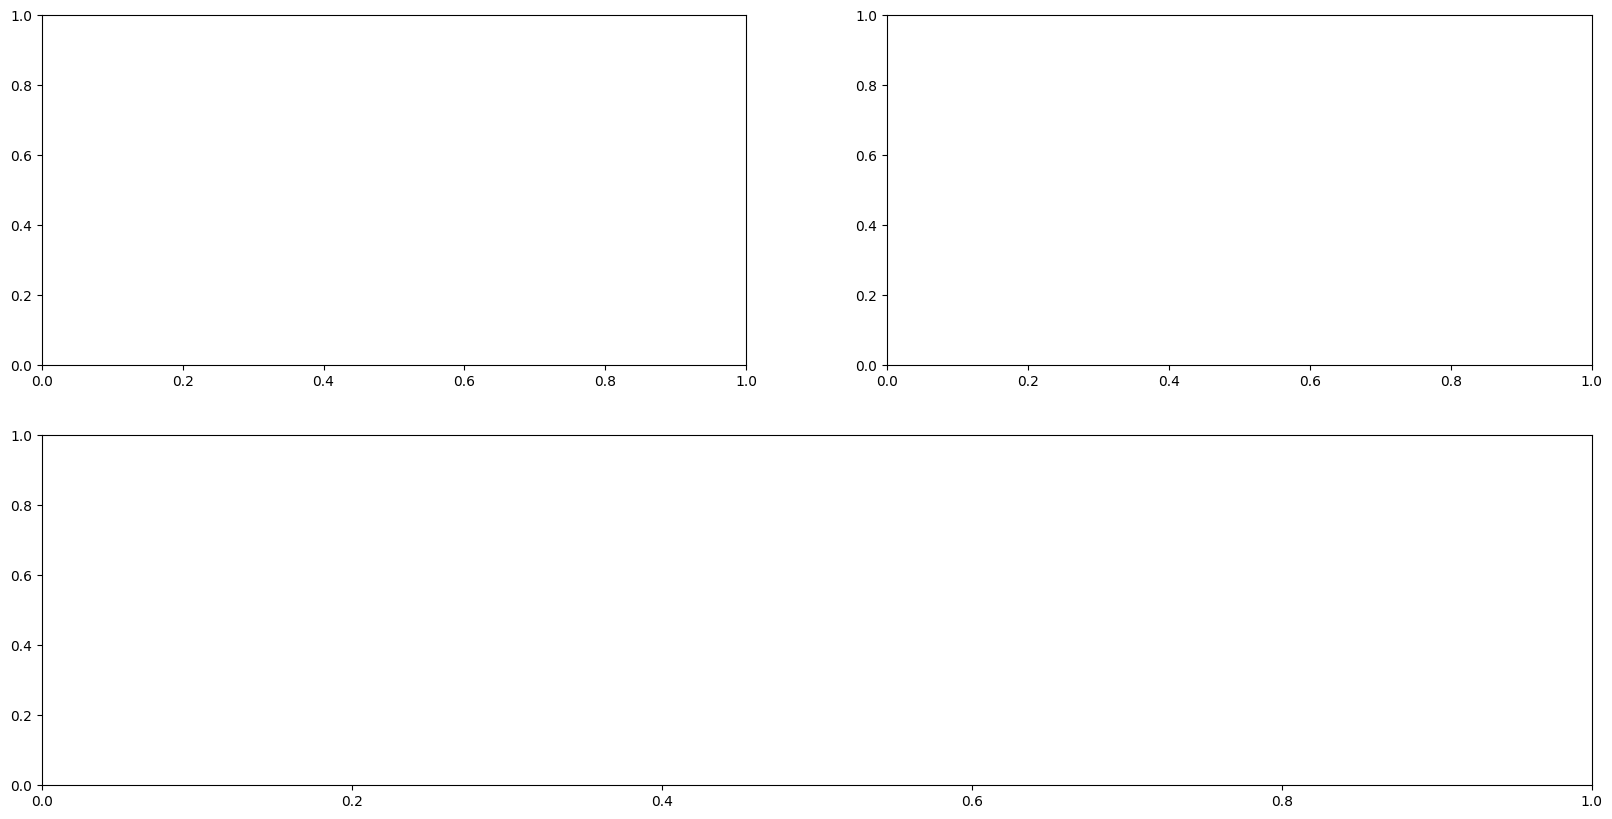

In [13]:
area = plt.figure()
fig5 = area.add_subplot(2, 2, 1)
fig6 = area.add_subplot(2, 2, 2)
fig7 = area.add_subplot(2, 1, 2)


# abc = dados.groupby(['Estado Civil', 'Idade'], dropna= False, as_index= False).agg(Sinistros = ('Sinistros', 'sum'), Prêmio= ('Prêmio','count'))

# # a = dados.groupby(['Estado Civil', 'Idade'])['Sinistros'].sum()
# # b = dados.groupby(['Estado Civil', 'Idade'])['Prêmio'].count()
# # pd.concat(objs= (a,b), axis = 1)

# fig6.scatter(abc.index, abc['Sinistros'], s = 2)
# # fig6.set_ylabel('Estado Civil')
# # fig6.set_title('Estado Civil por Idade')

